PID coefficients  :  [14.166822448649617, -14.125, 0.0, 1, 0]
b0:  14.166822448649617
b1:  -14.125
b2:  0.0
a1:  -1
a2:  0


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hefti_o\\Desktop\\PSI\\FNC\\iir_transfert_func.png'

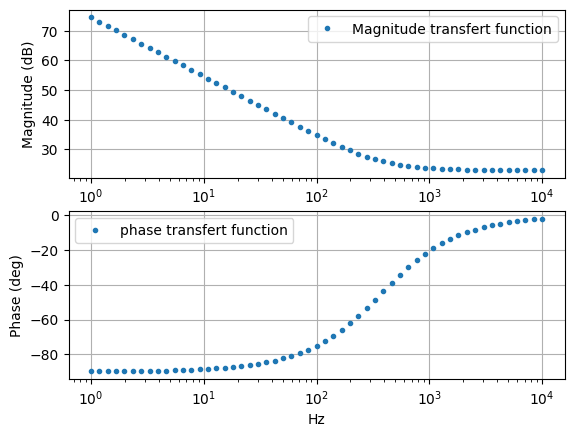

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 17 08:03:13 2022

@author: hefti_o
"""
import argparse
import asyncio
import collections
import logging

import math
from math import pi

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'


fold = 'C:/Users/hefti_o/Desktop/PSI/FNC/'



def pid_coefficients(Kii, Ki, Kp, Kd, Kdd, sample_period):
    """Calculate PID IIR filter coefficients."""

    # Determine filter order
    if Kii != 0:
        assert (Kdd, Kd) == (0, 0), \
                "IIR filters I^2 and D or D^2 gain are unsupported"
        order = 2
    elif Ki != 0:
        assert Kdd == 0, \
                "IIR filters with I and D^2 gain are unsupported"
        order = 1
    else:
        order = 0

    kernels = [
        [1, 0, 0],
        [1, -1, 0],
        [1, -2, 1]
    ]

    gains = [Kii, Ki, Kp, Kd, Kdd]
    w = 2*pi*sample_period
    b = [sum(gains[2 - order + i] * w**(order - i) * kernels[i][j]
             for i in range(3)) for j in range(3)]

    # Normalization is redundant because a0 is 1 in all cases.
    a = kernels[order]
    assert a[0] == 1
    return b + [-ai for ai in a[1:]] #[b0, b1, b2, -a1, -a2] IIR coefficients to be programmed into a
#       Stabilizer IIR filter configuration.


sampling_frequency = 800000 #Hz
coeffs = pid_coefficients(0, 2*np.pi*14.125*60, 14.125, 0, 0, 1/sampling_frequency)
#  gains = [args.Kii, args.Ki, args.Kp, args.Kd, args.Kdd] ; w = 2*pi*args.sample_period



print('PID coefficients  : ', coeffs)
print('b0: ', str(coeffs[0]))
print('b1: ', str(coeffs[1]))
print('b2: ', str(coeffs[2]))
print('a1: ', str( -coeffs[3]))
print('a2: ', str( -coeffs[4]))


#plot the complex transfert function:
import cmath   
T = 1/sampling_frequency
freqs = np.geomspace(1, 10000, 55)#np.linspace(1, 10000, 150)#freqs = 
omega = 2*math.pi*freqs
sigma = 0 


s = np.ones(len(freqs), dtype=complex)
z = np.ones(len(freqs), dtype=complex)
H = np.ones(len(freqs), dtype=complex)
for i in range(0,len(freqs)): 
               s[i] = complex(sigma, omega[i])
               #z = exp(s*T)
               z[i] = complex(np.cos(omega[i]*T), np.sin(omega[i]*T))
H = (coeffs[0] + coeffs[1]*z**(-1) + coeffs[2]*z**(-2) )/(1 - coeffs[3]*z**(-1) - coeffs[4]*z**(-2))

r   = np.ones(len(freqs))
phi = np.ones(len(freqs))

for i in range(0,len(freqs)): r[i], phi[i] = cmath.polar(H[i])


fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')

ax1.semilogx(freqs, 20*np.log10(r), '.', label = 'Magnitude transfert function')

ax1.set_xlabel('Hz')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid()
ax1.legend()


ax2.semilogx(freqs, 180*phi/math.pi, '.', label = 'phase transfert function')

ax2.set_xlabel('Hz')
ax2.set_ylabel('Phase (deg)')
ax2.grid()
ax2.legend()
plt.savefig( fold + "iir_transfert_func.png",dpi=800)
plt.show()